# Import library

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import math


# Load datas

## Load all files

### Load sleep data

In [57]:
sleep_files = os.listdir("../raw_data/Wellness/")

In [58]:
list_sleep = []

for file in sleep_files:
    if file.endswith(".json"):
        data = pd.read_json(f"../raw_data/Wellness/{file}")
        list_sleep.append(data)

In [59]:
sleep_df = pd.concat(list_sleep, ignore_index=True)

In [60]:
sleep_df

,sleepStartTimestampGMT,sleepEndTimestampGMT,calendarDate,sleepWindowConfirmationType,retro,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,spo2SleepSummary,averageRespiration,lowestRespiration,highestRespiration,awakeCount,avgSleepStress,sleepScores,restlessMomentCount,napList,sleepResultType
0,2019-08-28T20:30:00.0,2019-08-29T05:00:00.0,2019-08-29,UNCONFIRMED,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-08-29T21:12:00.0,2019-08-30T05:08:00.0,2019-08-30,ENHANCED_CONFIRMED_FINAL,False,5340.0,17940.0,4920.0,360.0,0.0,"{'userProfilePk': 79187125, 'deviceId': 330493...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-30T22:40:00.0,2019-08-31T06:35:00.0,2019-08-31,MANUALLY_CONFIRMED,False,1680.0,17940.0,8400.0,480.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-08-31T23:00:00.0,2019-09-01T07:06:00.0,2019-09-01,MANUALLY_CONFIRMED,False,120.0,16020.0,12420.0,600.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-09-01T20:45:00.0,2019-09-02T05:01:00.0,2019-09-02,MANUALLY_CONFIRMED,False,1260.0,15540.0,12840.0,120.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304,2023-01-23T20:53:00.0,2023-01-24T04:07:31.0,2023-01-24,ENHANCED_CONFIRMED_FINAL,False,3540.0,15720.0,5760.0,1020.0,0.0,NaN,13.0,7.0,17.0,1.0,19.24,"{'overallScore': 79, 'qualityScore': 81, 'dura...",34.0,NaN,NaN
3305,2023-01-24T21:29:00.0,2023-01-25T04:01:00.0,2023-01-25,ENHANCED_CONFIRMED_FINAL,False,5820.0,10920.0,6660.0,120.0,0.0,NaN,13.0,9.0,19.0,0.0,17.09,"{'overallScore': 80, 'qualityScore': 90, 'dura...",31.0,NaN,NaN
3306,2023-01-25T21:23:00.0,2023-01-26T04:14:58.0,2023-01-26,ENHANCED_CONFIRMED_FINAL,False,2880.0,16320.0,3780.0,1680.0,0.0,NaN,14.0,9.0,16.0,2.0,26.26,"{'overallScore': 64, 'qualityScore': 65, 'dura...",26.0,NaN,NaN
3307,2023-01-26T21:06:00.0,2023-01-27T03:43:00.0,2023-01-27,ENHANCED_CONFIRMED_FINAL,False,5760.0,13980.0,3360.0,720.0,0.0,NaN,13.0,10.0,17.0,1.0,19.73,"{'overallScore': 75, 'qualityScore': 81, 'dura...",32.0,NaN,NaN


In [61]:
sleep_df.tail()

,sleepStartTimestampGMT,sleepEndTimestampGMT,calendarDate,sleepWindowConfirmationType,retro,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,spo2SleepSummary,averageRespiration,lowestRespiration,highestRespiration,awakeCount,avgSleepStress,sleepScores,restlessMomentCount,napList,sleepResultType
3304,2023-01-23T20:53:00.0,2023-01-24T04:07:31.0,2023-01-24,ENHANCED_CONFIRMED_FINAL,False,3540.0,15720.0,5760.0,1020.0,0.0,NaN,13.0,7.0,17.0,1.0,19.24,"{'overallScore': 79, 'qualityScore': 81, 'dura...",34.0,NaN,NaN
3305,2023-01-24T21:29:00.0,2023-01-25T04:01:00.0,2023-01-25,ENHANCED_CONFIRMED_FINAL,False,5820.0,10920.0,6660.0,120.0,0.0,NaN,13.0,9.0,19.0,0.0,17.09,"{'overallScore': 80, 'qualityScore': 90, 'dura...",31.0,NaN,NaN
3306,2023-01-25T21:23:00.0,2023-01-26T04:14:58.0,2023-01-26,ENHANCED_CONFIRMED_FINAL,False,2880.0,16320.0,3780.0,1680.0,0.0,NaN,14.0,9.0,16.0,2.0,26.26,"{'overallScore': 64, 'qualityScore': 65, 'dura...",26.0,NaN,NaN
3307,2023-01-26T21:06:00.0,2023-01-27T03:43:00.0,2023-01-27,ENHANCED_CONFIRMED_FINAL,False,5760.0,13980.0,3360.0,720.0,0.0,NaN,13.0,10.0,17.0,1.0,19.73,"{'overallScore': 75, 'qualityScore': 81, 'dura...",32.0,NaN,NaN
3308,2023-01-27T22:05:00.0,2023-01-28T04:31:00.0,2023-01-28,ENHANCED_CONFIRMED_FINAL,False,2880.0,14400.0,5640.0,240.0,0.0,NaN,13.0,9.0,22.0,0.0,17.10,"{'overallScore': 77, 'qualityScore': 87, 'dura...",28.0,NaN,NaN


In [62]:
sleep_df.shape

(3309, 20)

### Load fitness data

In [63]:
fitness_files = os.listdir("../raw_data/Fitness/")

In [64]:
fitness_files

['nicko64@hotmail.fr_1001_summarizedActivities.json',
 'nicko64@hotmail.fr_0_summarizedActivities.json',
 'nicko64@hotmail.fr_2002_summarizedActivities.json',
 'nicko64@hotmail.fr_3003_summarizedActivities.json']

In [65]:
fitness_act = []

for file in fitness_files:
    if file.endswith(".json"):
        data = pd.read_json(f"../raw_data/Fitness/{file}")
        fitness_act.append(pd.DataFrame(data["summarizedActivitiesExport"][0]))

In [66]:
fitness_df = pd.concat(fitness_act, ignore_index=True)

In [67]:
fitness_df.head()

,activityId,uuidMsb,uuidLsb,name,activityType,userProfileId,timeZoneId,beginTimestamp,eventTypeId,rule,sportType,startTimeGmt,startTimeLocal,duration,distance,elevationGain,elevationLoss,avgSpeed,maxSpeed,avgHr,maxHr,avgPower,maxPower,avgBikeCadence,maxBikeCadence,calories,bmrCalories,startLongitude,startLatitude,aerobicTrainingEffect,strokes,normPower,max20MinPower,avgFractionalCadence,maxFractionalCadence,trainingStressScore,intensityFactor,vO2MaxValue,maxFtp,elapsedDuration,movingDuration,anaerobicTrainingEffect,deviceId,minTemperature,maxTemperature,minElevation,maxElevation,locationName,summarizedDiveInfo,maxVerticalSpeed,manufacturer,lapCount,endLongitude,endLatitude,waterEstimated,minRespirationRate,maxRespirationRate,avgRespirationRate,trainingEffectLabel,activityTrainingLoad,aerobicTrainingEffectMessage,anaerobicTrainingEffectMessage,moderateIntensityMinutes,vigorousIntensityMinutes,workoutFeel,workoutRpe,gainSolarActivityTime,avgSolarChargePercent,decoDive,purposeful,autoCalcCalories,favorite,pr,elevationCorrected,atpActivity,parent,avgRunCadence,maxRunCadence,steps,avgStrideLength,avgDoubleCadence,maxDoubleCadence,splitSummaries,splits,avgGradeAdjustedSpeed,avgStrokes,activeLengths,avgSwolf,poolLength,avgStrokeDistance,avgSwimCadence,startStress,endStress,differenceStress,avgStress,maxStress,avgVerticalOscillation,avgGroundContactTime,avgVerticalRatio,avgGroundContactBalance,isRunPowerWindDataEnabled,runPowerWindDataEnabled,workoutComplianceScore,avgVerticalSpeed,lactateThresholdBpm,lactateThresholdSpeed,description,courseId,caloriesConsumed,waterConsumed,maxSwimCadence,parentId,grit,avgFlow,trainingEffectLabelSrvrCalc,activityTrainingLoadSrvrCalc,differenceBodyBattery,workoutId,summarizedExerciseSets,activeSets,totalSets,totalReps,avgLeftBalance,avgRightBalance,maxDepth,avgDepth,surfaceInterval,floorsDescended,bottomTime
0,10292773069,-6019967502357739223,-8760569854703727208,Vincennes Gravel bike,gravel_cycling,79187125,124,1.673507e+12,9,subscribers,CYCLING,1.673507e+12,1.673510e+12,6.428596e+06,5.713990e+06,25300.000000,25300.000000,0.8888,1.2475,152.0,169.0,214.0,472.0,89.0,108.0,6352.07032,594.98284,2.453402,48.850212,4.1,9498.0,217.0,222.319167,0.000000,0.0,138.899994,0.884,75.0,246.0,6.440589e+06,6.426040e+06,1.0,3417492963,8.0,19.0,4820.000076,7080.000305,Vincennes,{},0.280000,GARMIN,12,2.453439,48.850164,891.0,13.58,47.119999,37.27,TEMPO,206.816513,HIGHLY_IMPACTING_TEMPO_23,MINOR_ANAEROBIC_BENEFIT_15,6.0,100.0,50.0,40.0,5.0,0.0,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10288386969,7716887342221640733,-5912561324474248429,Fontenay-sous-Bois Marche à pied,walking,79187125,124,1.673444e+12,9,private,STEPS,1.673444e+12,1.673447e+12,3.969503e+06,6.206620e+05,4136.000001,3958.999997,0.1564,0.2351,92.0,123.0,NaN,NaN,NaN,NaN,1420.41678,368.72176,2.453601,48.850689,0.6,NaN,NaN,NaN,0.617188,0.0,NaN,NaN,75.0,NaN,4.845839e+06,3.953000e+06,0.0,3404081962,NaN,NaN,5540.000153,7459.999847,Fontenay-sous-Bois,{},0.060001,GARMIN,7,2.453477,48.850187,481.0,NaN,NaN,NaN,UNKNOWN,8.337875,NO_AEROBIC_BENEFIT_18,NO_ANAEROBIC_BENEFIT_0,53.0,0.0,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,55.0,107.0,7346.0,84.315157,111.234375,214.0,"[{'totalAscent': 40.600000001490116, 'duration...","[{'startTimeSource': 0, 'endTimeSource': 0, 's...",0.1604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10287181479,-6031558055741273105,-6779937492133823383,Cyclisme,cycling,79187125,124,1.673439e+12,9,subscribers,CYCLING,1.673439e+12,1.673442e+12,2.350000e+05,8.233600e+04,NaN,NaN,0.3503,0.6522,NaN,NaN,NaN,NaN,NaN,NaN,67.04032,NaN,NaN,NaN,NaN,371.0,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,5.

# Clean datas

## Clean sleep

In [68]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sleepStartTimestampGMT       3309 non-null   object 
 1   sleepEndTimestampGMT         3309 non-null   object 
 2   calendarDate                 3309 non-null   object 
 3   sleepWindowConfirmationType  3309 non-null   object 
 4   retro                        3309 non-null   bool   
 5   deepSleepSeconds             3303 non-null   float64
 6   lightSleepSeconds            3303 non-null   float64
 7   remSleepSeconds              3275 non-null   float64
 8   awakeSleepSeconds            3303 non-null   float64
 9   unmeasurableSeconds          3303 non-null   float64
 10  spo2SleepSummary             4 non-null      object 
 11  averageRespiration           3239 non-null   float64
 12  lowestRespiration            3239 non-null   float64
 13  highestRespiration

In [69]:
sleep_df = sleep_df.drop_duplicates(subset=["calendarDate", "sleepStartTimestampGMT", "sleepEndTimestampGMT"])

In [70]:
sleep_df.columns

Index(['sleepStartTimestampGMT', 'sleepEndTimestampGMT', 'calendarDate',
       'sleepWindowConfirmationType', 'retro', 'deepSleepSeconds',
       'lightSleepSeconds', 'remSleepSeconds', 'awakeSleepSeconds',
       'unmeasurableSeconds', 'spo2SleepSummary', 'averageRespiration',
       'lowestRespiration', 'highestRespiration', 'awakeCount',
       'avgSleepStress', 'sleepScores', 'restlessMomentCount', 'napList',
       'sleepResultType'],
      dtype='object')

In [71]:
clean_sleep_df = sleep_df.drop(columns=["sleepResultType", "napList", "sleepWindowConfirmationType", "retro", "spo2SleepSummary", "averageRespiration","lowestRespiration", "highestRespiration", "restlessMomentCount", "awakeCount", "unmeasurableSeconds", "avgSleepStress"])

In [72]:
clean_sleep_df = clean_sleep_df[1:]

### convert datetime type

In [73]:
clean_sleep_df["date"]  = pd.to_datetime(clean_sleep_df["calendarDate"])

In [74]:
clean_sleep_df["start_sleep"] = pd.to_datetime(clean_sleep_df["sleepStartTimestampGMT"])
clean_sleep_df["end_sleep"] = pd.to_datetime(clean_sleep_df["sleepEndTimestampGMT"])

In [75]:
clean_sleep_df.drop(columns=["sleepStartTimestampGMT", "sleepEndTimestampGMT", "calendarDate"], inplace=True)

In [76]:
clean_sleep_df

,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,sleepScores,date,start_sleep,end_sleep
1,5340.0,17940.0,4920.0,360.0,NaN,2019-08-30,2019-08-29 21:12:00,2019-08-30 05:08:00
2,1680.0,17940.0,8400.0,480.0,NaN,2019-08-31,2019-08-30 22:40:00,2019-08-31 06:35:00
3,120.0,16020.0,12420.0,600.0,NaN,2019-09-01,2019-08-31 23:00:00,2019-09-01 07:06:00
4,1260.0,15540.0,12840.0,120.0,NaN,2019-09-02,2019-09-01 20:45:00,2019-09-02 05:01:00
5,2700.0,18600.0,6540.0,360.0,NaN,2019-09-03,2019-09-02 21:11:00,2019-09-03 05:01:00
...,...,...,...,...,...,...,...,...
2604,4140.0,13200.0,6900.0,0.0,NaN,2020-02-02,2020-02-02 01:12:00,2020-02-02 07:56:00
2605,6240.0,13860.0,9300.0,960.0,NaN,2020-02-03,2020-02-02 22:18:00,2020-02-03 06:44:00
2606,8640.0,13140.0,6780.0,540.0,NaN,2020-02-04,2020-02-03 21:52:00,2020-02-04 05:57:00
2607,6060.0,16440.0,6540.0,300.0,NaN,2020-02-05,2020-02-04 21:54:00,2020-02-05 06:03:00


In [77]:
cols = ["date", "start_sleep", "end_sleep", "deepSleepSeconds", "lightSleepSeconds", "remSleepSeconds", "awakeSleepSeconds", "sleepScores"]

In [78]:
clean_sleep_df = clean_sleep_df[cols]

In [79]:
clean_sleep_df_copy = clean_sleep_df.copy()

In [80]:
clean_sleep_df_copy['qualityScore'] = clean_sleep_df_copy['sleepScores'].apply(lambda x: x.get('qualityScore') if isinstance(x, dict) else None)

In [81]:
clean_sleep_df_copy.drop(columns="sleepScores", inplace=True)

In [82]:
clean_sleep_df = clean_sleep_df_copy

## Clean fitness

#### Select good features

In [83]:
ALL_KEYS = [
'beginTimestamp',
#     'activeLengths',
#  'activeSets',
#  'activityId',
 'activityTrainingLoad',
#  'activityTrainingLoadSrvrCalc',
 'activityType',
 'aerobicTrainingEffect',
 'aerobicTrainingEffectMessage',
 'anaerobicTrainingEffect',
 'anaerobicTrainingEffectMessage',
#  'atpActivity',
#  'autoCalcCalories',
 'avgBikeCadence',
#  'avgDepth',
#  'avgDoubleCadence',
#  'avgFlow',
#  'avgFractionalCadence',
#  'avgGradeAdjustedSpeed',
#  'avgGroundContactBalance',
#  'avgGroundContactTime',
 'avgHr',
#  'avgLeftBalance',
 'avgPower',
#  'avgRespirationRate',
#  'avgRightBalance',
 'avgRunCadence',
#  'avgSolarChargePercent',
 'avgSpeed',
#  'avgStress',
#  'avgStrideLength',
#  'avgStrokeDistance',
#  'avgStrokes',
#  'avgSwimCadence',
#  'avgSwolf',
#  'avgVerticalOscillation',
#  'avgVerticalRatio',
#  'avgVerticalSpeed',
#  'bmrCalories',
#  'bottomTime',
 'calories',
 'caloriesConsumed',
#  'courseId',
#  'decoDive',
#  'description',
#  'deviceId',
#  'differenceBodyBattery',
#  'differenceStress',
 'distance',
 'duration',
#  'elapsedDuration',
#  'elevationCorrected',
#  'elevationGain',
#  'elevationLoss',
#  'endLatitude',
#  'endLongitude',
#  'endStress',
#  'eventTypeId',
#  'favorite',
#  'floorsDescended',
#  'gainSolarActivityTime',
#  'grit',
#  'intensityFactor',
#  'isRunPowerWindDataEnabled',
#  'lactateThresholdBpm',
#  'lactateThresholdSpeed',
#  'lapCount',
#  'locationName',
#  'manufacturer',
#  'max20MinPower',
#  'maxBikeCadence',
#  'maxDepth',
#  'maxDoubleCadence',
#  'maxElevation',
#  'maxFractionalCadence',
#  'maxFtp',
 'maxHr',
 'maxPower',
#  'maxRespirationRate',
 'maxRunCadence',
 'maxSpeed',
#  'maxStress',
#  'maxSwimCadence',
#  'maxTemperature',
#  'maxVerticalSpeed',
#  'minElevation',
#  'minRespirationRate',
#  'minTemperature',
 'moderateIntensityMinutes',
#  'movingDuration',
#  'name',
 'normPower',
#  'parent',
#  'parentId',
#  'poolLength',
#  'pr',
#  'purposeful',
#  'rule',
#  'runPowerWindDataEnabled',
#  'splitSummaries',
#  'splits',
 'sportType',
#  'startLatitude',
#  'startLongitude',
#  'startStress',
#  'startTimeGmt',
#  'startTimeLocal',
#  'steps',
#  'strokes',
#  'summarizedDiveInfo',
#  'summarizedExerciseSets',
#  'surfaceInterval',
#  'timeZoneId',
#  'totalReps',
#  'totalSets',
 'trainingEffectLabel',
#  'trainingEffectLabelSrvrCalc',
 'trainingStressScore',
#  'userProfileId',
#  'uuidLsb',
#  'uuidMsb',
#  'vO2MaxValue',
 'vigorousIntensityMinutes',
#  'waterConsumed',
#  'waterEstimated',
#  'workoutComplianceScore',
#  'workoutFeel',
#  'workoutId',
#  'workoutRpe'
]

In [84]:
len(ALL_KEYS)

26

In [85]:
fitness_df.drop_duplicates(subset=["beginTimestamp"])

,activityId,uuidMsb,uuidLsb,name,activityType,userProfileId,timeZoneId,beginTimestamp,eventTypeId,rule,sportType,startTimeGmt,startTimeLocal,duration,distance,elevationGain,elevationLoss,avgSpeed,maxSpeed,avgHr,maxHr,avgPower,maxPower,avgBikeCadence,maxBikeCadence,calories,bmrCalories,startLongitude,startLatitude,aerobicTrainingEffect,strokes,normPower,max20MinPower,avgFractionalCadence,maxFractionalCadence,trainingStressScore,intensityFactor,vO2MaxValue,maxFtp,elapsedDuration,movingDuration,anaerobicTrainingEffect,deviceId,minTemperature,maxTemperature,minElevation,maxElevation,locationName,summarizedDiveInfo,maxVerticalSpeed,manufacturer,lapCount,endLongitude,endLatitude,waterEstimated,minRespirationRate,maxRespirationRate,avgRespirationRate,trainingEffectLabel,activityTrainingLoad,aerobicTrainingEffectMessage,anaerobicTrainingEffectMessage,moderateIntensityMinutes,vigorousIntensityMinutes,workoutFeel,workoutRpe,gainSolarActivityTime,avgSolarChargePercent,decoDive,purposeful,autoCalcCalories,favorite,pr,elevationCorrected,atpActivity,parent,avgRunCadence,maxRunCadence,steps,avgStrideLength,avgDoubleCadence,maxDoubleCadence,splitSummaries,splits,avgGradeAdjustedSpeed,avgStrokes,activeLengths,avgSwolf,poolLength,avgStrokeDistance,avgSwimCadence,startStress,endStress,differenceStress,avgStress,maxStress,avgVerticalOscillation,avgGroundContactTime,avgVerticalRatio,avgGroundContactBalance,isRunPowerWindDataEnabled,runPowerWindDataEnabled,workoutComplianceScore,avgVerticalSpeed,lactateThresholdBpm,lactateThresholdSpeed,description,courseId,caloriesConsumed,waterConsumed,maxSwimCadence,parentId,grit,avgFlow,trainingEffectLabelSrvrCalc,activityTrainingLoadSrvrCalc,differenceBodyBattery,workoutId,summarizedExerciseSets,activeSets,totalSets,totalReps,avgLeftBalance,avgRightBalance,maxDepth,avgDepth,surfaceInterval,floorsDescended,bottomTime
0,10292773069,-6019967502357739223,-8760569854703727208,Vincennes Gravel bike,gravel_cycling,79187125,124,1.673507e+12,9,subscribers,CYCLING,1.673507e+12,1.673510e+12,6.428596e+06,5.713990e+06,25300.000000,25300.000000,0.888800,1.247500,152.0,169.0,214.0,472.0,89.0,108.0,6352.07032,594.98284,2.453402,48.850212,4.1,9498.0,217.0,222.319167,0.000000,0.0,138.899994,0.884,75.0,246.0,6.440589e+06,6.426040e+06,1.0,3417492963,8.0,19.0,4820.000076,7080.000305,Vincennes,{},0.280000,GARMIN,12,2.453439,48.850164,891.0,13.58,47.119999,37.27,TEMPO,206.816513,HIGHLY_IMPACTING_TEMPO_23,MINOR_ANAEROBIC_BENEFIT_15,6.0,100.0,50.0,40.0,5.0,0.0,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10288386969,7716887342221640733,-5912561324474248429,Fontenay-sous-Bois Marche à pied,walking,79187125,124,1.673444e+12,9,private,STEPS,1.673444e+12,1.673447e+12,3.969503e+06,6.206620e+05,4136.000001,3958.999997,0.156400,0.235100,92.0,123.0,NaN,NaN,NaN,NaN,1420.41678,368.72176,2.453601,48.850689,0.6,NaN,NaN,NaN,0.617188,0.0,NaN,NaN,75.0,NaN,4.845839e+06,3.953000e+06,0.0,3404081962,NaN,NaN,5540.000153,7459.999847,Fontenay-sous-Bois,{},0.060001,GARMIN,7,2.453477,48.850187,481.0,NaN,NaN,NaN,UNKNOWN,8.337875,NO_AEROBIC_BENEFIT_18,NO_ANAEROBIC_BENEFIT_0,53.0,0.0,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,55.0,107.0,7346.0,84.315157,111.234375,214.0,"[{'totalAscent': 40.600000001490116, 'duration...","[{'startTimeSource': 0, 'endTimeSource': 0, 's...",0.1604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10287181479,-6031558055741273105,-6779937492133823383,Cyclisme,cycling,79187125,124,1.673439e+12,9,subscribers,CYCLING,1.673439e+12,1.673442e+12,2.350000e+05,8.233600e+04,NaN,NaN,0.350300,0.652200,NaN,NaN,NaN,NaN,NaN,NaN,67.04032,NaN,NaN,NaN,NaN,371.0,NaN,NaN,0.000000,0.0,NaN,Na

In [86]:
pd.set_option("display.max_columns", None)
clean_fitness_df = fitness_df[ALL_KEYS]

In [87]:
clean_fitness_df

,beginTimestamp,activityTrainingLoad,activityType,aerobicTrainingEffect,aerobicTrainingEffectMessage,anaerobicTrainingEffect,anaerobicTrainingEffectMessage,avgBikeCadence,avgHr,avgPower,avgRunCadence,avgSpeed,calories,caloriesConsumed,distance,duration,maxHr,maxPower,maxRunCadence,maxSpeed,moderateIntensityMinutes,normPower,sportType,trainingEffectLabel,trainingStressScore,vigorousIntensityMinutes
0,1.673507e+12,206.816513,gravel_cycling,4.1,HIGHLY_IMPACTING_TEMPO_23,1.0,MINOR_ANAEROBIC_BENEFIT_15,89.0,152.0,214.0,NaN,0.888800,6352.07032,NaN,5.713990e+06,6.428596e+06,169.0,472.0,NaN,1.247500,6.0,217.0,CYCLING,TEMPO,138.899994,100.0
1,1.673444e+12,8.337875,walking,0.6,NO_AEROBIC_BENEFIT_18,0.0,NO_ANAEROBIC_BENEFIT_0,NaN,92.0,NaN,55.0,0.156400,1420.41678,NaN,6.206620e+05,3.969503e+06,123.0,NaN,107.0,0.235100,53.0,NaN,STEPS,UNKNOWN,NaN,0.0
2,1.673439e+12,NaN,cycling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.350300,67.04032,NaN,8.233600e+04,2.350000e+05,NaN,NaN,NaN,0.652200,NaN,NaN,CYCLING,NaN,NaN,NaN
3,1.673431e+12,70.955368,gravel_cycling,2.7,MAINTAINING_AEROBIC_BASE_7,0.5,NO_ANAEROBIC_BENEFIT_0,87.0,137.0,183.0,NaN,0.825800,2476.30182,NaN,2.380361e+06,2.882591e+06,164.0,564.0,NaN,1.057200,18.0,191.0,CYCLING,AEROBIC_BASE,48.000000,28.0
4,1.673419e+12,53.277725,lap_swimming,2.5,MAINTAINING_AEROBIC_BASE_7,0.0,NO_ANAEROBIC_BENEFIT_0,NaN,131.0,NaN,NaN,0.061400,2656.47268,NaN,3.050000e+05,4.967937e+06,146.0,NaN,NaN,0.077700,8.0,NaN,SWIMMING,AEROBIC_BASE,NaN,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405,1.564421e+12,NaN,cycling,NaN,NaN,NaN,NaN,NaN,141.0,NaN,NaN,0.817104,2702.56290,NaN,3.239000e+06,3.964000e+06,157.0,NaN,NaN,2.017000,NaN,NaN,CYCLING,NaN,NaN,NaN
3406,1.564210e+12,NaN,running,NaN,NaN,NaN,NaN,NaN,158.0,NaN,NaN,0.409692,2291.94094,NaN,1.116000e+06,2.724000e+06,167.0,NaN,NaN,0.858000,NaN,NaN,RUNNING,NaN,NaN,NaN
3407,1.564033e+12,NaN,running,NaN,NaN,NaN,NaN,NaN,156.0,NaN,NaN,0.366764,2924.63396,NaN,1.375000e+06,3.749000e+06,170.0,NaN,NaN,7.390650,NaN,NaN,RUNNING,NaN,NaN,NaN
3408,1.563860e+12,NaN,cycling,NaN,NaN,NaN,NaN,NaN,138.0,NaN,NaN,0.790430,2530.77208,NaN,3.089000e+06,3.908000e+06,155.0,NaN,NaN,59.154341,NaN,NaN,CYCLING,NaN,NaN,NaN


#### convert datetime type

In [88]:
clean_fitness_df["date"] = pd.to_datetime(clean_fitness_df["beginTimestamp"], unit="ms").dt.date
clean_fitness_df["date"] = pd.to_datetime(clean_fitness_df["date"])
clean_fitness_df["beginTimestamp"] = pd.to_datetime(clean_fitness_df["beginTimestamp"], unit="ms")

/tmp/ipykernel_357850/1447991906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_fitness_df["date"] = pd.to_datetime(clean_fitness_df["beginTimestamp"], unit="ms").dt.date
/tmp/ipykernel_357850/1447991906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_fitness_df["date"] = pd.to_datetime(clean_fitness_df["date"])
/tmp/ipykernel_357850/1447991906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [89]:
clean_fitness_df["duration"] = pd.to_datetime(clean_fitness_df["duration"], unit="ms")

/tmp/ipykernel_357850/346452399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_fitness_df["duration"] = pd.to_datetime(clean_fitness_df["duration"], unit="ms")


In [90]:
clean_fitness_df

,beginTimestamp,activityTrainingLoad,activityType,aerobicTrainingEffect,aerobicTrainingEffectMessage,anaerobicTrainingEffect,anaerobicTrainingEffectMessage,avgBikeCadence,avgHr,avgPower,avgRunCadence,avgSpeed,calories,caloriesConsumed,distance,duration,maxHr,maxPower,maxRunCadence,maxSpeed,moderateIntensityMinutes,normPower,sportType,trainingEffectLabel,trainingStressScore,vigorousIntensityMinutes,date
0,2023-01-12 06:57:29,206.816513,gravel_cycling,4.1,HIGHLY_IMPACTING_TEMPO_23,1.0,MINOR_ANAEROBIC_BENEFIT_15,89.0,152.0,214.0,NaN,0.888800,6352.07032,NaN,5.713990e+06,1970-01-01 01:47:08.596191406,169.0,472.0,NaN,1.247500,6.0,217.0,CYCLING,TEMPO,138.899994,100.0,2023-01-12
1,2023-01-11 13:29:30,8.337875,walking,0.6,NO_AEROBIC_BENEFIT_18,0.0,NO_ANAEROBIC_BENEFIT_0,NaN,92.0,NaN,55.0,0.156400,1420.41678,NaN,6.206620e+05,1970-01-01 01:06:09.502929687,123.0,NaN,107.0,0.235100,53.0,NaN,STEPS,UNKNOWN,NaN,0.0,2023-01-11
2,2023-01-11 12:01:41,NaN,cycling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.350300,67.04032,NaN,8.233600e+04,1970-01-01 00:03:55.000000000,NaN,NaN,NaN,0.652200,NaN,NaN,CYCLING,NaN,NaN,NaN,2023-01-11
3,2023-01-11 09:52:15,70.955368,gravel_cycling,2.7,MAINTAINING_AEROBIC_BASE_7,0.5,NO_ANAEROBIC_BENEFIT_0,87.0,137.0,183.0,NaN,0.825800,2476.30182,NaN,2.380361e+06,1970-01-01 00:48:02.591064453,164.0,564.0,NaN,1.057200,18.0,191.0,CYCLING,AEROBIC_BASE,48.000000,28.0,2023-01-11
4,2023-01-11 06:42:15,53.277725,lap_swimming,2.5,MAINTAINING_AEROBIC_BASE_7,0.0,NO_ANAEROBIC_BENEFIT_0,NaN,131.0,NaN,NaN,0.061400,2656.47268,NaN,3.050000e+05,1970-01-01 01:22:47.937011718,146.0,NaN,NaN,0.077700,8.0,NaN,SWIMMING,AEROBIC_BASE,NaN,75.0,2023-01-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405,2019-07-29 17:15:40,NaN,cycling,NaN,NaN,NaN,NaN,NaN,141.0,NaN,NaN,0.817104,2702.56290,NaN,3.239000e+06,1970-01-01 01:06:04.000000000,157.0,NaN,NaN,2.017000,NaN,NaN,CYCLING,NaN,NaN,NaN,2019-07-29
3406,2019-07-27 06:45:42,NaN,running,NaN,NaN,NaN,NaN,NaN,158.0,NaN,NaN,0.409692,2291.94094,NaN,1.116000e+06,1970-01-01 00:45:24.000000000,167.0,NaN,NaN,0.858000,NaN,NaN,RUNNING,NaN,NaN,NaN,2019-07-27
3407,2019-07-25 05:41:12,NaN,running,NaN,NaN,NaN,NaN,NaN,156.0,NaN,NaN,0.366764,2924.63396,NaN,1.375000e+06,1970-01-01 01:02:29.000000000,170.0,NaN,NaN,7.390650,NaN,NaN,RUNNING,NaN,NaN,NaN,2019-07-25
3408,2019-07-23 05:31:13,NaN,cycling,NaN,NaN,NaN,NaN,NaN,138.0,NaN,NaN,0.790430,2530.77208,NaN,3.089000e+06,1970-01-01 01:05:08.000000000,155.0,NaN,NaN,59.154341,NaN,NaN,CYCLING,NaN,NaN,NaN,2019-07-23


In [91]:
clean_fitness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   beginTimestamp                  3398 non-null   datetime64[ns]
 1   activityTrainingLoad            3373 non-null   float64       
 2   activityType                    3410 non-null   object        
 3   aerobicTrainingEffect           3371 non-null   float64       
 4   aerobicTrainingEffectMessage    3369 non-null   object        
 5   anaerobicTrainingEffect         3369 non-null   float64       
 6   anaerobicTrainingEffectMessage  3369 non-null   object        
 7   avgBikeCadence                  596 non-null    float64       
 8   avgHr                           3376 non-null   float64       
 9   avgPower                        598 non-null    float64       
 10  avgRunCadence                   1536 non-null   float64       
 11  avgS

# Merge sleep and fitness

In [92]:
clean_fitness_df.head()

,beginTimestamp,activityTrainingLoad,activityType,aerobicTrainingEffect,aerobicTrainingEffectMessage,anaerobicTrainingEffect,anaerobicTrainingEffectMessage,avgBikeCadence,avgHr,avgPower,avgRunCadence,avgSpeed,calories,caloriesConsumed,distance,duration,maxHr,maxPower,maxRunCadence,maxSpeed,moderateIntensityMinutes,normPower,sportType,trainingEffectLabel,trainingStressScore,vigorousIntensityMinutes,date
0,2023-01-12 06:57:29,206.816513,gravel_cycling,4.1,HIGHLY_IMPACTING_TEMPO_23,1.0,MINOR_ANAEROBIC_BENEFIT_15,89.0,152.0,214.0,NaN,0.8888,6352.07032,NaN,5.713990e+06,1970-01-01 01:47:08.596191406,169.0,472.0,NaN,1.2475,6.0,217.0,CYCLING,TEMPO,138.899994,100.0,2023-01-12
1,2023-01-11 13:29:30,8.337875,walking,0.6,NO_AEROBIC_BENEFIT_18,0.0,NO_ANAEROBIC_BENEFIT_0,NaN,92.0,NaN,55.0,0.1564,1420.41678,NaN,6.206620e+05,1970-01-01 01:06:09.502929687,123.0,NaN,107.0,0.2351,53.0,NaN,STEPS,UNKNOWN,NaN,0.0,2023-01-11
2,2023-01-11 12:01:41,NaN,cycling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3503,67.04032,NaN,8.233600e+04,1970-01-01 00:03:55.000000000,NaN,NaN,NaN,0.6522,NaN,NaN,CYCLING,NaN,NaN,NaN,2023-01-11
3,2023-01-11 09:52:15,70.955368,gravel_cycling,2.7,MAINTAINING_AEROBIC_BASE_7,0.5,NO_ANAEROBIC_BENEFIT_0,87.0,137.0,183.0,NaN,0.8258,2476.30182,NaN,2.380361e+06,1970-01-01 00:48:02.591064453,164.0,564.0,NaN,1.0572,18.0,191.0,CYCLING,AEROBIC_BASE,48.000000,28.0,2023-01-11
4,2023-01-11 06:42:15,53.277725,lap_swimming,2.5,MAINTAINING_AEROBIC_BASE_7,0.0,NO_ANAEROBIC_BENEFIT_0,NaN,131.0,NaN,NaN,0.0614,2656.47268,NaN,3.050000e+05,1970-01-01 01:22:47.937011718,146.0,NaN,NaN,0.0777,8.0,NaN,SWIMMING,AEROBIC_BASE,NaN,75.0,2023-01-11


In [93]:
clean_sleep_df.head()

,date,start_sleep,end_sleep,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,qualityScore
1,2019-08-30,2019-08-29 21:12:00,2019-08-30 05:08:00,5340.0,17940.0,4920.0,360.0,NaN
2,2019-08-31,2019-08-30 22:40:00,2019-08-31 06:35:00,1680.0,17940.0,8400.0,480.0,NaN
3,2019-09-01,2019-08-31 23:00:00,2019-09-01 07:06:00,120.0,16020.0,12420.0,600.0,NaN
4,2019-09-02,2019-09-01 20:45:00,2019-09-02 05:01:00,1260.0,15540.0,12840.0,120.0,NaN
5,2019-09-03,2019-09-02 21:11:00,2019-09-03 05:01:00,2700.0,18600.0,6540.0,360.0,NaN


In [94]:
merged_df = pd.merge(clean_sleep_df, clean_fitness_df, on="date", how="inner") 

In [95]:
merge_cols = merged_df.columns

In [96]:
merged_df.shape

(3380, 34)

In [41]:
for col in merge_cols:
    print(col)
    print((merged_df[col].isna().sum() / 6724) * 100)

date
0.0
start_sleep
0.0
end_sleep
0.0
deepSleepSeconds
0.0148720999405116
lightSleepSeconds
0.0148720999405116
remSleepSeconds
0.297441998810232
awakeSleepSeconds
0.0148720999405116
qualityScore
22.516359309934565
beginTimestamp
0.0
activityTrainingLoad
0.3123140987507436
activityType
0.0
aerobicTrainingEffect
0.3420582986317668
aerobicTrainingEffectMessage
0.37180249851279
anaerobicTrainingEffect
0.37180249851279
anaerobicTrainingEffectMessage
0.37180249851279
avgBikeCadence
41.418798334324805
avgHr
0.3271861986912552
avgPower
41.38905413444378
avgRunCadence
27.453896490184416
avgSpeed
0.0297441998810232
calories
0.0297441998810232
caloriesConsumed
49.18203450327186
distance
0.0297441998810232
duration
0.0
maxHr
0.3271861986912552
maxPower
41.4039262343843
maxRunCadence
27.453896490184416
maxSpeed
8.670434265318262
moderateIntensityMinutes
24.09280190362879
normPower
41.418798334324805
sportType
0.0297441998810232
trainingEffectLabel
0.3123140987507436
trainingStressScore
44.60142772

# Analyses 

## Analyse time sleep 

In [43]:
clean_sleep_df.columns

Index(['date', 'start_sleep', 'end_sleep', 'deepSleepSeconds',
       'lightSleepSeconds', 'remSleepSeconds', 'awakeSleepSeconds',
       'qualityScore'],
      dtype='object')

In [47]:
timesleep = clean_sleep_df["deepSleepSeconds"] + clean_sleep_df["lightSleepSeconds"] + clean_sleep_df["remSleepSeconds"] + clean_sleep_df["awakeSleepSeconds"]
timesleep = (timesleep / 60) / 60

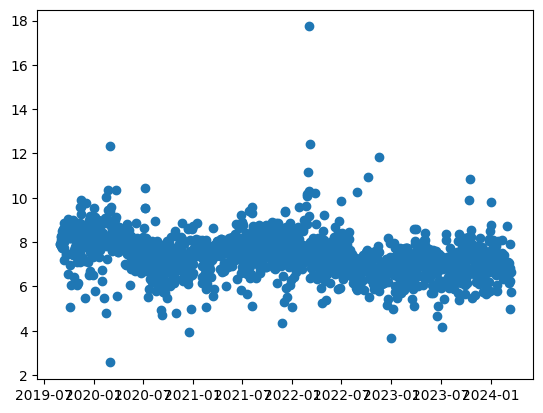

In [49]:
plt.plot_date(clean_sleep_df["date"], timesleep);

In [50]:
timesleep.mean()

7.3944849959448495

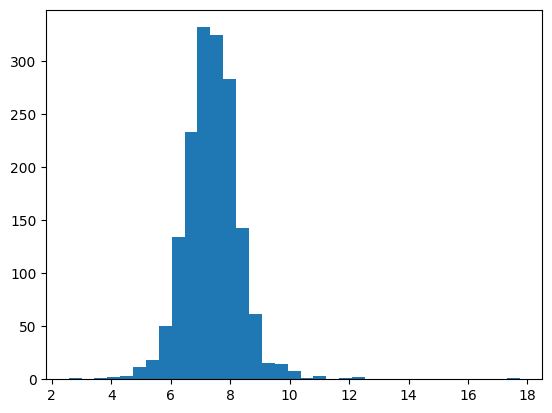

In [51]:
plt.hist(timesleep, bins=35);